In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("COVID-19-time-series-clean-complete.csv")
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data['DateYearMonth'] = data['Date'].map(lambda date: 100 * date.year + date.month)
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001


In [7]:
aprilData = data[data["DateYearMonth"] == 202004].reset_index()

aprilDataFinal = aprilData.groupby("Country/Region")["Confirmed"].sum().reset_index().sort_values("Confirmed",ascending = False).reset_index()
aprilDataFinal.head(8)

,index,Country/Region,Confirmed
0,179,US,19960815
1,162,Spain,5236777
2,84,Italy,4928524
3,65,Germany,3942925
4,61,France,3456319
5,183,United Kingdom,3328344
6,36,China,2500143
7,80,Iran,2255837


In [8]:
del aprilDataFinal["index"]
aprilDataFinal.head(8)

,Country/Region,Confirmed
0,US,19960815
1,Spain,5236777
2,Italy,4928524
3,Germany,3942925
4,France,3456319
5,United Kingdom,3328344
6,China,2500143
7,Iran,2255837


In [10]:
data_iran = data.loc[(data['Country/Region']=='Iran')]
data_iran.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
80,80,2020-01-22,Iran,0,0,0.0,0.0,0,0,0,202001
273,273,2020-01-23,Iran,0,0,0.0,0.0,0,0,0,202001
466,466,2020-01-24,Iran,0,0,0.0,0.0,0,0,0,202001
659,659,2020-01-25,Iran,0,0,0.0,0.0,0,0,0,202001
852,852,2020-01-26,Iran,0,0,0.0,0.0,0,0,0,202001


In [11]:
nd = data_iran.groupby(['DateYearMonth'])['New deaths'].sum().reset_index()
nc = data_iran.groupby(['DateYearMonth'])['New cases'].sum().reset_index()

In [15]:
nd

,DateYearMonth,New deaths
0,202001,0
1,202002,43
2,202003,2855
3,202004,3130
4,202005,1769
5,202006,3020
6,202007,5949
7,202008,4805
8,202009,4598
9,202010,8695


In [16]:
nc

,DateYearMonth,New cases
0,202001,0
1,202002,593
2,202003,44012
3,202004,50035
4,202005,56826
5,202006,76196
6,202007,76542
7,202008,71008
8,202009,82007
9,202010,155553


Text(0.5, 1.0, 'New Cases & New Deaths (IRAN)')

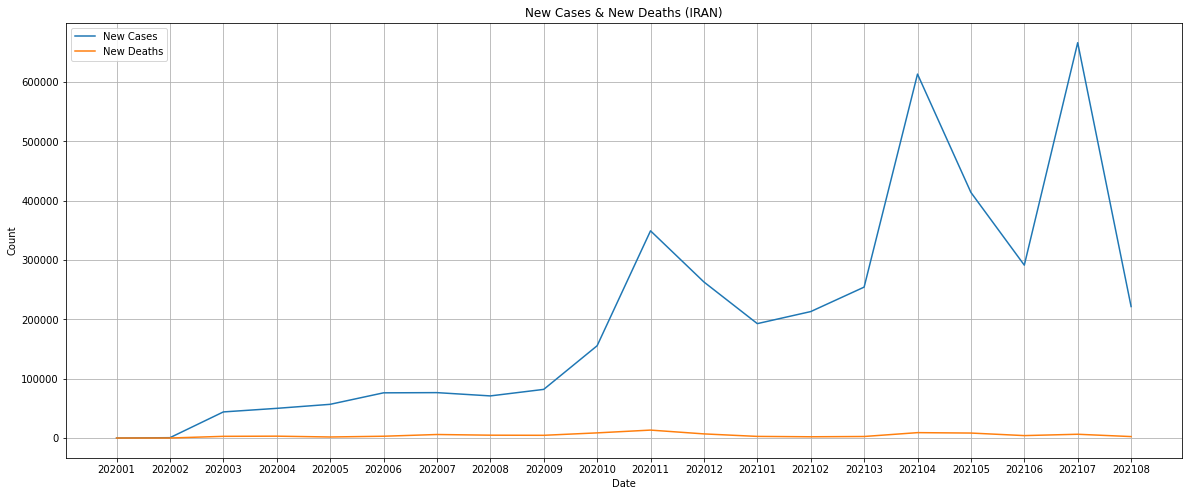

In [18]:
plt.figure(figsize = (20, 8))

plt.plot(nc['DateYearMonth'].to_numpy(dtype=str), nc['New cases'], label='New Cases')
plt.plot(nd['DateYearMonth'].to_numpy(dtype=str), nd['New deaths'], label='New Deaths')

plt.xlabel("Date")
plt.ylabel("Count")

plt.grid()
plt.legend(loc='best')
plt.title('New Cases & New Deaths (IRAN)')